<a href="https://colab.research.google.com/github/bhargav23/OpenCV/blob/main/Annotations_Converter_CSV_TO_JSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
imgpath =  "/content/drive/MyDrive/OpenCV/Data/AnnotationImages/"

In [ ]:
def get_img_shape(im):
  img = cv2.imread(imgpath+im)
  return list(img.shape)

In [ ]:
images = []
imgdict = {}
imageid = 0
for file in os.listdir(imgpath):
  s = get_img_shape(file)
  images.append({"id": imageid,  "license": 1, "file_name":file, "height": s[0], "width": s[1]})
  imgdict[file] = imageid
  imageid += 1

In [ ]:
len(annots)

941

In [ ]:
csvpath = "/content/drive/MyDrive/OpenCV/Data/csv/"

In [ ]:
import pandas as pd
import numpy as np
import json
import os
import cv2
from ast import literal_eval
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
dir_list = os.listdir(csvpath)
to_process = []
for file in dir_list:
  if not file.startswith("merge"):
    to_process.append(csvpath+file)

In [ ]:
to_process

['/content/drive/MyDrive/OpenCV/Data/csv/000001-000100_csv.csv',
 '/content/drive/MyDrive/OpenCV/Data/csv/000200-000300_csv.csv',
 '/content/drive/MyDrive/OpenCV/Data/csv/000501-000520_csv.csv',
 '/content/drive/MyDrive/OpenCV/Data/csv/000401-000500_csv.csv',
 '/content/drive/MyDrive/OpenCV/Data/csv/000200-000220_csv.csv']

In [ ]:
categorydict = {"busfront": 0, "busrear": 1, "busside": 2, "frontdoor": 3, "reardoor": 4, "busroute": 5}

In [ ]:
df = pd.read_csv(to_process[0])

In [ ]:
s = df.region_shape_attributes.apply(dict)

ValueError: ignored

In [ ]:
def FetchCategoryText(attrs):
  try: 
    if attrs["Entity"]=="Bus":
      return "bus"+attrs["Vehicle Pose"].lower().split()[0]
    elif attrs["Entity"]=="Door":
      return attrs["Door Location"].lower().replace(" ", '')
    elif attrs["Entity"]=="Route":
      return "busroute"
    else:
      return None
  except:
    return None

def FetchCategory(attrs):
  t = FetchCategoryText(attrs)
  if t and t in categorydict:
    return categorydict[t]
  return -1

In [ ]:
annotid = 0
annots = []
for csv in to_process:
  df = pd.read_csv(csv)
  df['region_shape_attributes'] = df.region_shape_attributes.apply(eval)
  df['region_attributes'] = df.region_attributes.apply(eval)
  for index, row in df.iterrows():
    c = FetchCategory(row["region_attributes"])
    if c>-1:
      s = row["region_shape_attributes"]
      annot = {
          "id": annotid,
          "image_id": imgdict[row["filename"]],
          "category_id" : c,
          "bbox": [s["x"], s["y"], s["width"], s["height"]],
          "area": s["width"]*s["height"]
      }
      annots.append(annot)    

In [ ]:
cocodict = {
    "info": {
        "year": "2021",
        "version": "1",
        "description": "Bus Annotations by VITB folks",
        "date_created": "2021-07-09T00:00:00+00:00"
    },
    "licenses": [
        {
            "id": 1,
            "url": "https://creativecommons.org/publicdomain/zero/1.0/",
            "name": "Public Domain"
        }
    ],
    "categories": [
        {"id": 0, "name": "busfront", "supercategory": "Bus"},
        {"id": 1, "name": "busrear", "supercategory": "Bus"},
        {"id": 2, "name": "busside", "supercategory": "Bus"},
        {"id": 3, "name": "frontdoor", "supercategory": "Door"},
        {"id": 4, "name": "reardoor", "supercategory": "Door"},
        {"id": 5, "name": "busroute", "supercategory": "Route"},
        ], 
    "images":images, 
    "annotations": annots
    }


In [ ]:
annotatedimages = list(set([annot["image_id"] for annot in annots]))

In [ ]:
len(annotatedimages)

678

In [ ]:
import json
with open("data3.json", "w") as f:
  json.dump(cocodict, f)

In [ ]:
mergedcsv = csvpath+"merged.csv"

In [ ]:
annotid = 0
annots = []
df = pd.read_csv(mergedcsv)
df['region_shape_attributes'] = df.region_shape_attributes.apply(eval)
df['region_attributes'] = df.region_attributes.apply(eval)
for index, row in df.iterrows():
  c = FetchCategory(row["region_attributes"])
  if c>-1:
    print(annotid)
    s = row["region_shape_attributes"]
    annot = {
        "id": annotid,
        "image_id": imgdict[row["filename"]],
        "category_id" : c,
        "bbox": [s["x"], s["y"], s["width"], s["height"]],
        "area": s["width"]*s["height"]
    }
    annots.append(annot)  
    annotid += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

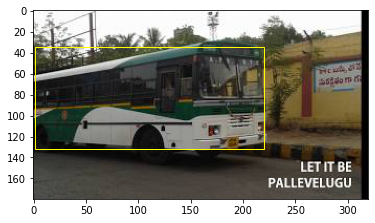

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im = Image.open(imgpath+df1['filename'][0])

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)

# Create a Rectangle patch
rect = patches.Rectangle((df1['x'][0],df1['y'][0]), df1['width'][0], df1['height'][0], linewidth=1, edgecolor='yellow', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [ ]:
from torchvision import transforms
import albumentations as A
import albumentations.pytorch as AP
import random

class AlbumentationTransforms:
    def __init__(self, transforms_list=[]):	
        transforms_list.append(AP.ToTensor())
        self.transforms = A.Compose(transforms_list)

    def __call__(self, img):
        img = np.array(img)
        return self.transforms(image=img)['image']
    
train_transforms = AlbumentationTransforms(
    [ A.Rotate((-30.0, 30.0)),
      A.HorizontalFlip(),
      A.RGBShift(r_shift_limit=50, g_shift_limit=50, b_shift_limit=50, p=0.5),
      A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
      A.Cutout(num_holes=6)])

test_transforms = AlbumentationTransforms([A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))])

In [ ]:
!python via2dark.py Bus_Door_000001_000100.json via.names

Traceback (most recent call last):
  File "via2dark.py", line 64, in <module>
    main()
  File "via2dark.py", line 44, in main
    imageName = data['filename']
KeyError: 'filename'


In [ ]:
!curl -L "https://app.roboflow.com/ds/gHCzDrcBgS?key=6m8kwWE05V" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
!git clone https://github.com/theschoolofai/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 9.32 MiB/s, done.
Resolving deltas: 100% (7/7), done.
